In [2]:
import pandas as pd

In [3]:
# MAPEAMENTO UNIFICADO - todos
url='https://raw.githubusercontent.com/romulosilvestre/semanaclassificacao/refs/heads/master/dataset/anacondabank_credit_scoring.csv'

df= pd.read_csv(url)

df_transformado=df.copy()

df_transformado['conta_corrente'].unique()

#etapa 2 - Dicionario
dict_cc={
    '< 0 DM':1,

    '0 <= ... < 200 DM':2,
    'no checking account':3,
    '>= 200 DM / salary assignments for at least 1 year':4
}
# etapa - Mapear
# dataset['coluna'] = dataset['coluna'].map(dicionario)
df_transformado['conta_corrente'] = df_transformado['conta_corrente'].map(dict_cc)

(df_transformado['historico_credito'].unique())
dict_hc={
    'critical account/ other credits existing (not at this bank)':1,
    'existing credits paid back duly till now':2,
    'delay in paying off in the past':3,
    'no credits taken/ all credits paid back duly':4,
    'all credits at this bank paid back duly':5
}
df_transformado['historico_credito'] = df_transformado['historico_credito'].map(dict_hc)

dict_pe={
    'domestic appliances':1,
    '(vacation - does not exist?)':2,
    'radio/television':3,
    'car (new)':4,
    'car (used)':5,
    'business':6,
    'repairs':7,
    'education':8,
    'furniture/equipment':9,
    'retraining':10


}
df_transformado['proposito_emprestimo'] = df_transformado['proposito_emprestimo'].map(dict_pe)

dict_rc={
    'unknown/ no savings account':1,
    '... < 100 DM':2,
    '500 <= ... < 1000 DM ':3,
    '.. >= 1000 DM ':4,
    '100 <= ... < 500 DM':5
}
df_transformado['reserva_cc'] = df_transformado['reserva_cc'].map(dict_rc)

df_transformado['outros_fiadores'].unique()


# Dictionary
dict_ofiador_cc = {
    'none': 0,
    'guarantor': 1,
    'co-applicant': 2

}

df_transformado['outros_fiadores'] = df_transformado['outros_fiadores'].map(dict_ofiador_cc)

df_transformado['outros_planos_financiamento'].unique()

dict_opf = {
    'none': 1,
    'bank': 2,
    'stores': 3,
    
}
df_transformado['outros_planos_financiamento'] = df_transformado['outros_planos_financiamento'].map(dict_opf)

df_transformado['propriedade'].unique()
dict_cc_prop = {
    'real estate': 1,
    'if not A121 : building society savings agreement/ life insurance': 2,
    'unknown / no property': 3,
    'if not A121/A122 : car or other, not in attribute 6': 4
}


df_transformado['propriedade'] = df_transformado['propriedade'].map(dict_cc_prop)

df_transformado['telefone'].unique()

dict_telefone = {
    'yes, registered under the customers name ':1,
    'none':0,
}

df_transformado['telefone'] = df_transformado['telefone'].map(dict_telefone)


df_transformado['trabalhador_estrangeiro'].unique()


dict_trabalhador_estrangeiro = {
    'yes':1,
    'no':0,
}

df_transformado['trabalhador_estrangeiro'] = df_transformado['trabalhador_estrangeiro'].map(dict_trabalhador_estrangeiro)

df_transformado['tipo_residencia'].unique()


dict_res = {
    'own':1,
    'for free':2,
    'rent':3,
}

df_transformado['tipo_residencia'] = df_transformado['tipo_residencia'].map(dict_res)

df_transformado['status_emprego'].unique()

dict_status = {
    'skilled employee / official':1,
    'unskilled - resident':2,
    'management/ self-employed/ highly qualified employee/ officer':3,
    'unemployed/ unskilled - non-resident':4
}


df_transformado['status_emprego'] = df_transformado['status_emprego'].map(dict_status)

df_transformado['tempo_emprego_atual'].unique()
dict_cc={
        '.. >= 7 years':1,
        '1 <= ... < 4 years':2,
        '4 <= ... < 7 years':3,
        'unemployed':4,
        '... < 1 year ':5

    }
df_transformado['tempo_emprego_atual'] = df_transformado['tempo_emprego_atual'].map(dict_cc)


df_transformado['sexo_est_civil'].unique()
dict_cc={
    'male : single':1,
    'female : divorced/separated/married':2,
     'male : divorced/separated':3,
     'male : married/widowed':4
}
df_transformado['sexo_est_civil'] = df_transformado['sexo_est_civil'].map(dict_cc)
df_transformado.info()
	



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   default                      1000 non-null   int64
 1   conta_corrente               1000 non-null   int64
 2   prazo_emprestimo_meses       1000 non-null   int64
 3   historico_credito            1000 non-null   int64
 4   proposito_emprestimo         1000 non-null   int64
 5   valor_emprestimo             1000 non-null   int64
 6   reserva_cc                   1000 non-null   int64
 7   tempo_emprego_atual          1000 non-null   int64
 8   taxa_comp_salario            1000 non-null   int64
 9   sexo_est_civil               1000 non-null   int64
 10  outros_fiadores              1000 non-null   int64
 11  anos_residencia_atual        1000 non-null   int64
 12  propriedade                  1000 non-null   int64
 13  idade                        1000 non-null   int6

In [4]:
! pip install scikit-learn

In [5]:
df_transformado.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,0,4,1,67,1,1,2,1,1,1,1
1,1,2,48,2,1,5951,2,2,2,2,0,2,1,22,1,1,1,1,1,0,1
2,0,3,12,1,2,2096,2,3,2,1,0,3,1,49,1,1,1,2,2,0,1
3,0,1,42,2,3,7882,2,3,2,1,1,4,2,45,1,2,1,1,2,0,1
4,1,1,24,3,4,4870,2,2,3,1,0,4,3,53,1,2,2,1,2,0,1


# Criando o modelo preditivo

In [6]:
# train_test_split
# X (dados)
X = df_transformado.drop(columns='default')



In [7]:
# Definir y (rótulos/classes)
# Variável para prever o futuro

y= df_transformado['default']

In [8]:
# Importar o train_test_split
from sklearn.model_selection import train_test_split

# definir uma constante semente SEED

SEED = 77

# definir variáveis de treino e teste (X,y) e chamar o método

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=SEED)

In [9]:
from sklearn.linear_model import LogisticRegression

# Criar um objeto da classe LogisticRegression

modelo = LogisticRegression(max_iter=5000)

In [10]:
# Treinar 
modelo.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

# Métricas

In [11]:
# 1  - acurácia de treino
print(f'acurácia: {modelo.score(X_train,y_train)*100:.2f}%')


acurácia: 75.43%


In [12]:
# 2 - acurácia de teste
previsoes = modelo.predict(X_test) # modelo traz as previsões dos dados

from sklearn.metrics import accuracy_score

# definindo a acurácia

acuracia = accuracy_score(y_test,previsoes)

# mostro a variável 

print(f'A acurácia de teste foi: {acuracia*100:.2f}%')

A acurácia de teste foi: 75.67%


Matriz Confusão

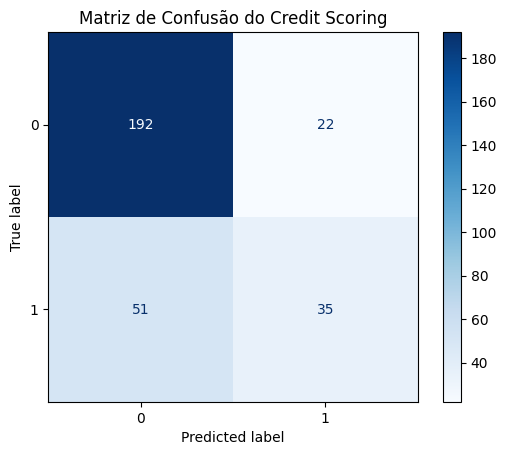

In [13]:
# instalar matplotlib
# importações
import matplotlib.pyplot as plt
# importar ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
# fazendo a previsão com o modelo treinado usando dados de teste
y_pred = modelo.predict(X_test)
# Criando a matriz de confusão

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='Blues')
# Adicionando um  título 
plt.title('Matriz de Confusão do Credit Scoring')
plt.show()

In [14]:
# Gerar Classification Report
 
from sklearn.metrics import classification_report

# Suponha que você tenha as variáveis y_true (rótulos verdadeiros) e y_pred (rótulos previstos)
print(classification_report(y_test,previsoes))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       214
           1       0.61      0.41      0.49        86

    accuracy                           0.76       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.74      0.76      0.74       300



In [15]:
#Curva ROC
# Roc_curve = curva
# Roc_auc_score = área 
from sklearn.metrics import roc_curve, roc_auc_score

## Entendendo a Curva Roc na Prática

Especificidade : Taxa de falsos positivos
* especificidade = VN/(VN + FP)
* sensibilidade = VP/ (VP +FN)

In [16]:
# Importação
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidade 
prob_previsao = modelo.predict_proba(X_test)[:,1]

#tfp = taxa de falsos positivos
# tvp = taxa de verdadeiros positivos
# limite = 
tfp, tvp, limite =roc_curve(y_test,prob_previsao)

# Área 

print('roc_auc',roc_auc_score(y_test,prob_previsao))

roc_auc 0.753097152792871


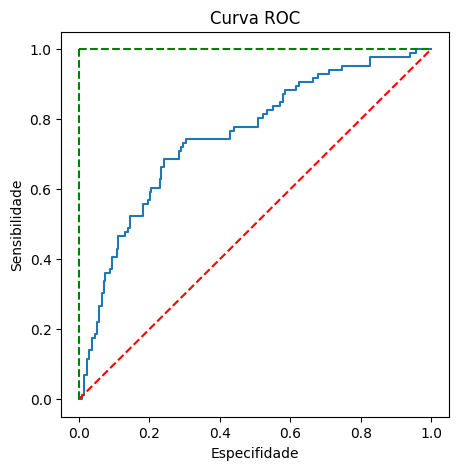

In [17]:
# figura
plt.subplots(1, figsize=(5,5))
# titulo
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()


# Como avaliar a curva ROC

AUC

* Convenção estatistica
1) área < 0.7 - baixa discriminação 
2) 0.7 <= área < 0.8 - discriminação aceitavel
3) 0.8 <= área < 0.9 - discriminação excelente
4) área > 0.9 - discriminação excepcional
 

Atividade
Ánalisar o dataset atual seguindo as leis  brasileiras. Treinar um novo modelo, comparar o novo modelo com o baseline